In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ftsms\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ftsms\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
def preprocess_document(document):
    # Tokenize, remove stopwords and stem
    tokens = word_tokenize(document.lower())  # Convert to lower case
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

In [76]:
documents_df = pd.read_csv(r'C:\Users\ftsms\Downloads\docsdata.csv', encoding='utf-8')
documents = documents_df['text'].tolist()

In [85]:
def boolean_query(query, documents):
    query_terms = preprocess_document(query)
    doc_freq_pairs = []

    for doc_id, document in enumerate(documents):
        document_terms = preprocess_document(document)
        term_count = sum(term in document_terms for term in query_terms)
        if term_count > 0:
            doc_freq_pairs.append((doc_id, term_count))

    # If no document matches, return empty lists
    if not doc_freq_pairs:
        return [], []

    # Unzip the pairs to separate lists
    doc_ids, frequencies = zip(*doc_freq_pairs)
    return doc_ids, frequencies

# Perform the query and get frequencies
query = "information"
doc_ids, frequencies = boolean_query(query, documents)


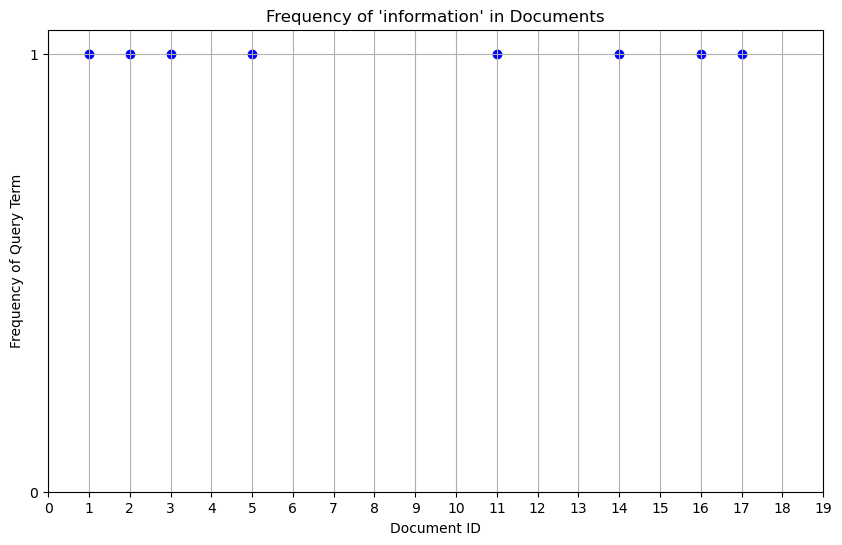

In [86]:
def plot_frequencies(doc_ids, frequencies):
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.scatter(doc_ids, frequencies, color='blue')  # Set a color for the points
    plt.title(f"Frequency of '{query}' in Documents")
    plt.xlabel('Document ID')
    plt.ylabel('Frequency of Query Term')
    plt.xticks(range(len(documents)))  # Set x-ticks to be document IDs
    plt.yticks(range(max(frequencies)+1))  # Set y-ticks to be frequency counts
    plt.grid(True)  # Turn on the grid
    plt.show()

# Plotting the results
plot_frequencies(doc_ids, frequencies)
